##   R ನಲ್ಲಿ Pandas ಬಳಕೆದಾರಿಕೆ  
  ನಾವು R ನಲ್ಲಿ pandas ಬಳಕೆದಾರಿಕೆಯನ್ನು ಪರಿಹರಿಸಲು dplyr ಲೈಬ್ರರಿಯನ್ನು ಬಳಸಬೇಕು. ನಾವು ಸಾಮಾನ್ಯ ಡೇಟಾ ಸೈನ್ಸ್ ಲೈಬ್ರರಿಗಳನ್ನು ಆಮದು ಮಾಡಿಕೊಳ್ಳುವುದರಿಂದ ಪ್ರಾರಂಭಿಸುತ್ತೇವೆ.


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

## ಸರಣಿ


ಸೀರೀಸ್ ಒಂದು ಪಟ್ಟಿ ಅಥವಾ 1D-ಅರೆನಂತೆ ಇದೆ, ಆದರೆ ಸೂಚ್ಯಂಕದೊಂದಿಗೆ. ಎಲ್ಲಾ ಕಾರ್ಯಾಚರಣೆಗಳು ಸೂಚ್ಯಂಕ-ಸಮನ್ವಯವಾಗಿವೆ. R ನಲ್ಲಿ ಸಾಲಿನ ಸೂಚ್ಯಂಕವನ್ನು row.names ಅನ್ನು ಬಳಸಬೇಕು.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


 ಸರಣಿಗಳಲ್ಲಿ ಒಂದು ಸಾಮಾನ್ಯ ಬಳಕೆ ಸಮಯ ಸರಣಿಯಾಗಿದೆ. ಸಮಯ ಸರಣಿಯಲ್ಲಿ, ಸೂಚ್ಯಂಕವು ವಿಶೇಷ ರಚನೆ ಹೊಂದಿದೆ - ಸಾಮಾನ್ಯವಾಗಿ ದಿನಾಂಕಗಳ ಅಥವಾ ದಿನಾಂಕ-ಸಮಯಗಳ ಶ್ರೇಣಿ. ಸಮಯ ಸರಣಿಯನ್ನು ರಚಿಸಲು ಸುಲಭವಾದ ವಿಧಾನವು ts ಫಂಕ್ಷನ್ ಬಳಕೆ ಮಾಡುವುದು. ಆದರೆ ನಾವು ಸಮಯ ಸರಣಿಯನ್ನು ಅನುಷ್ಠಾನಗೊಳಿಸಲು ಮತ್ತೊಂದು ವಿಧಾನವನ್ನು ಪ್ರಯತ್ನಿಸುವೆವು. ದಿನಾಂಕಗಳ ಸೂಚ್ಯಂಕವನ್ನು ರಚಿಸಲು seq ಫಂಕ್ಷನ್ ಬಳಸಿ lubridate ಗ್ರಂಥಾಲಯವನ್ನು ಬಳಸಬೇಕಾಗುತ್ತದೆ.

ನಾವು ಪ್ರತಿದಿನ ಖರೀದಿಸಿದ ಉತ್ಪನ್ನದ ಪ್ರಮಾಣವನ್ನು ತೋರಿಸುವ ಸರಣಿ ಹೊಂದಿದ್ದೇವೆ ಎಂದು ಊಹಿಸೋಣ, ಮತ್ತು ಪ್ರತಿದಿನ ಭಾನುವಾರ ನಾವು ನಮ್ಮಿಗಾಗಿ ಒಂದು ಹೆಚ್ಚುವರಿ ಐಟಂ ತೆಗೆದುಕೊಳ್ಳಬೇಕಾಗುತ್ತದೆ ಎಂದು ತಿಳಿದಿದ್ದೇವೆ. ಸರಣಿಯನ್ನು ಬಳಸಿಕೊಂಡು ಇದನ್ನು ಹೇಗೆ ಮಾದರೀಕರಿಸುವುದು ಇಲ್ಲಿದೆ:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


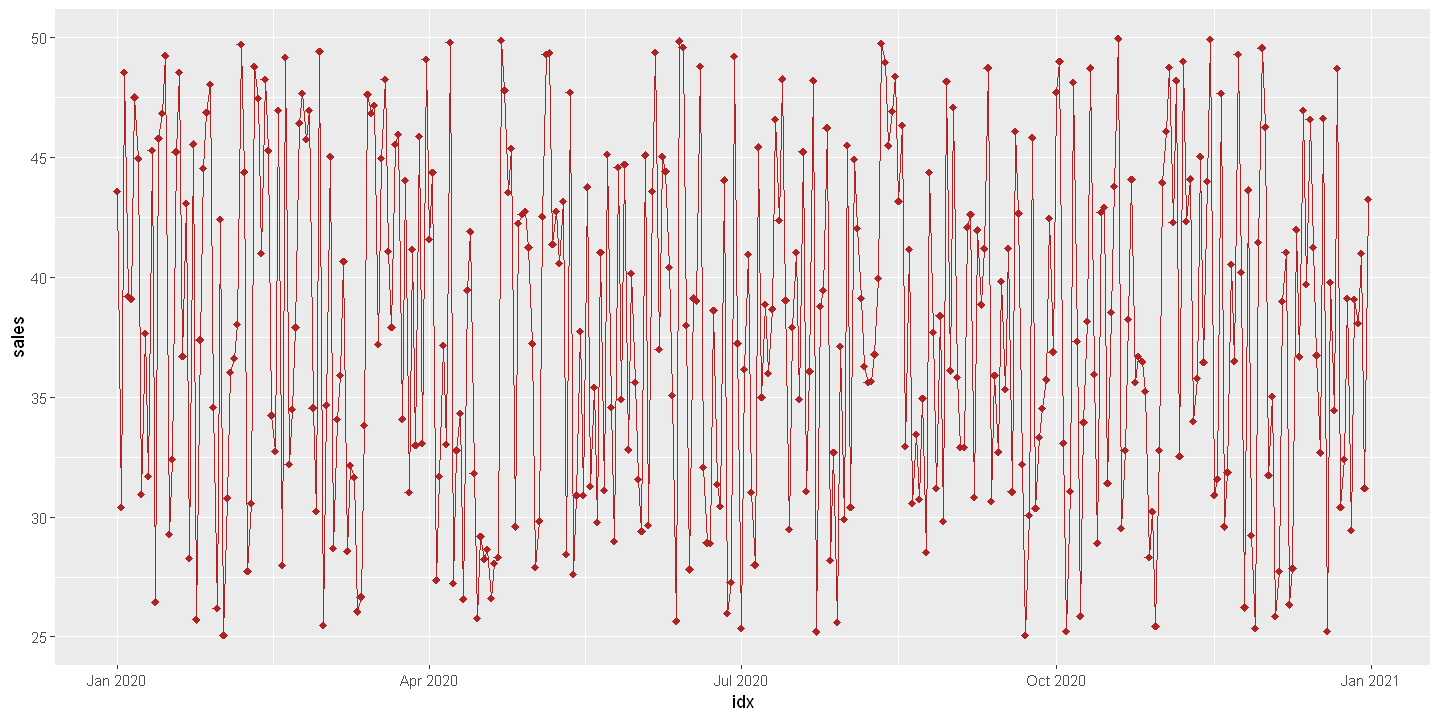

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

ನಾವು total no of products ಕಂಡುಹಿಡಿಯಲು additional_items ಮತ್ತು sold_items ಅನ್ನು ಮರ್ಜ್ ಮಾಡುತ್ತಿದ್ದೇವೆ.  
ನೀವು ನೋಡಬಹುದು, total ಕಂಡುಹಿಡಿಯಲು ಇಲ್ಲಿ ಸಮಸ್ಯೆಗಳು ಉಂಟಾಗುತ್ತಿವೆ, ನಾವು NaN ಮೌಲ್ಯವನ್ನು ಪಡೆಯುತ್ತಿದ್ದೇವೆ ಏಕೆಂದರೆ ವಾರದ ಸರಣಿಯಲ್ಲಿ ಉಲ್ಲೇಖಿಸದ ದಿನಗಳನ್ನು ಕಳೆದುಹೋಗಿರುವ (NaN) ಎಂದು ಪರಿಗಣಿಸಲಾಗುತ್ತದೆ, NaN ಅನ್ನು ಸಂಖ್ಯೆಗೆ ಸೇರಿಸಿದರೆ NaN ಸಿಗುತ್ತದೆ.  
ಸೇರಿಸಲು, ನಾವು NaN ಅನ್ನು 0 ರಿಂದ ಬದಲಾಯಿಸಬೇಕಾಗುತ್ತದೆ.


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

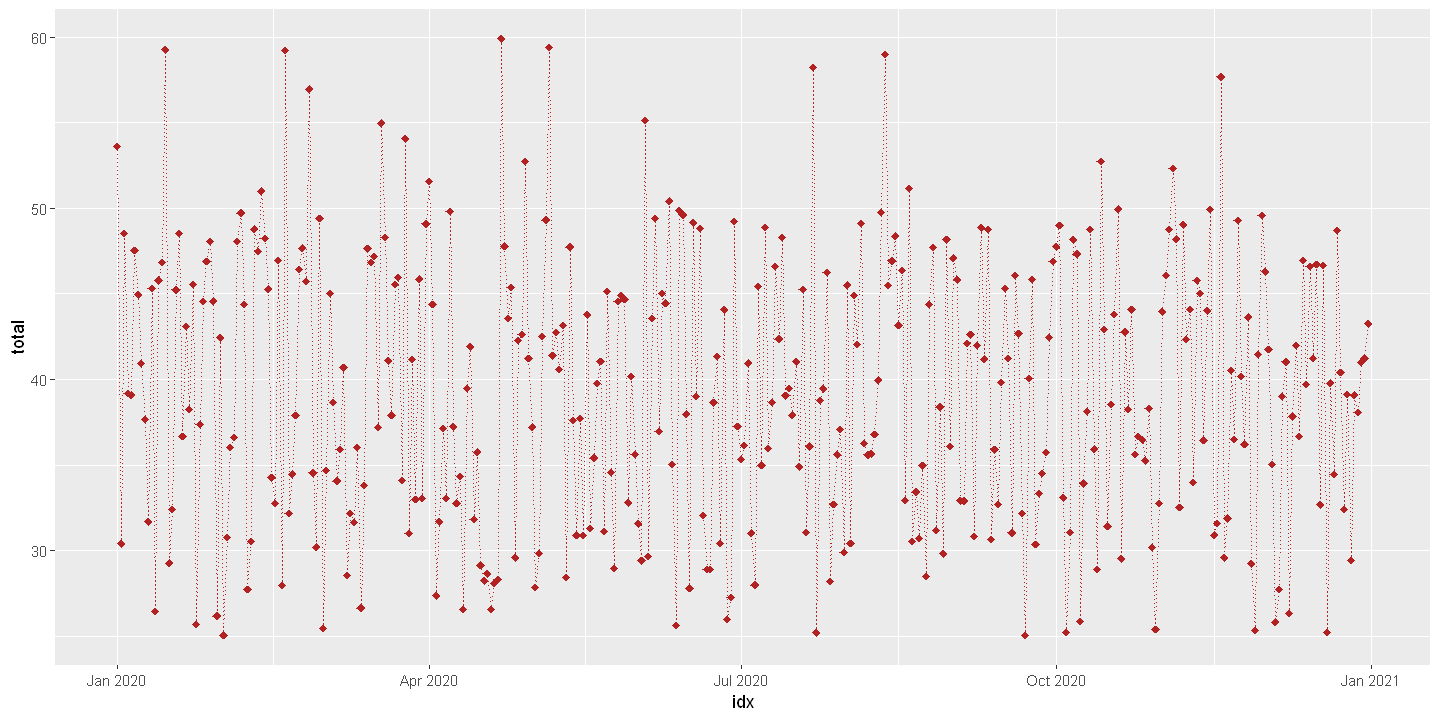

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

ನಾವು ಮಾಸಿಕ ಆಧಾರದ ಮೇಲೆ ಒಟ್ಟು ಉತ್ಪನ್ನಗಳ ಸಂಖ್ಯೆಯನ್ನು ವಿಶ್ಲೇಷಿಸಲು ಬಯಸುತ್ತೇವೆ. ಆದ್ದರಿಂದ, ನಾವು ಒಂದು ತಿಂಗಳಲ್ಲಿ ಒಟ್ಟು ಉತ್ಪನ್ನಗಳ ಸರಾಸರಿ ಕಂಡುಹಿಡಿದು ಬಾರ್‌ಗ್ರಾಫ್ ರಚಿಸುತ್ತೇವೆ.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

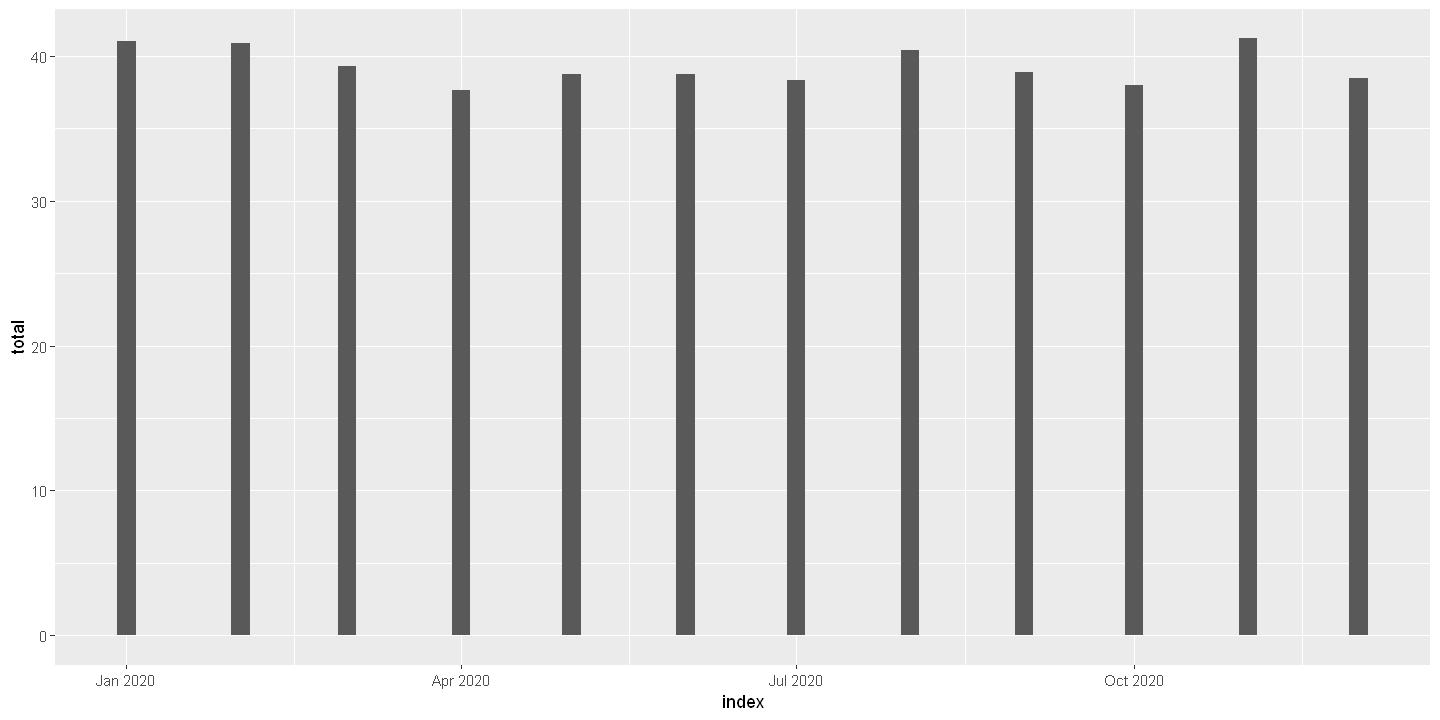

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## DataFrame
ಡೇಟಾಫ್ರೇಮ್ ಮೂಲತಃ ಒಂದೇ ಸೂಚ್ಯಂಕ ಹೊಂದಿರುವ ಸರಣಿಗಳ ಸಂಗ್ರಹವಾಗಿದೆ. ನಾವು ಹಲವಾರು ಸರಣಿಗಳನ್ನು ಒಟ್ಟಿಗೆ ಸೇರಿಸಿ ಡೇಟಾಫ್ರೇಮ್ ಮಾಡಬಹುದು.  
ಉದಾಹರಣೆಗೆ ನಾವು a ಮತ್ತು b ಸರಣಿಗಳ ಡೇಟಾಫ್ರೇಮ್ ಮಾಡುತ್ತಿದ್ದೇವೆ.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

ನಾವು rename ಫಂಕ್ಷನ್ ಬಳಸಿ ಕಾಲಮ್ ಹೆಸರನ್ನು ಮರುನಾಮಕರಣ ಮಾಡಬಹುದು


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

ನಾವು select ಫಂಕ್ಷನ್ ಬಳಸಿ ಡೇಟಾಫ್ರೇಮ್‌ನಲ್ಲಿ ಒಂದು ಕಾಲಮ್ ಆಯ್ಕೆ ಮಾಡಬಹುದು


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

ನಾವು ಸರಣಿಯ ಮೇಲೆ ನಿರ್ದಿಷ್ಟ ತಾರ್ಕಿಕ ಮಾನದಂಡವನ್ನು ಪೂರೈಸುವ ಸಾಲುಗಳನ್ನು ಹೊರತೆಗೆಯುತ್ತೇವೆ


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

ಹೊಸ ಕಾಲಮ್‌ಗಳನ್ನು ರಚಿಸುವುದು.

ಕೆಳಗಿನ ಕೋಡ್ ಸರಣಿಯನ್ನು ರಚಿಸುತ್ತದೆ, ಇದು a ಯ ಸರಾಸರಿ ಮೌಲ್ಯದಿಂದ ವ್ಯತ್ಯಾಸವನ್ನು ಲೆಕ್ಕಹಾಕುತ್ತದೆ ಮತ್ತು ನಂತರ ಅದನ್ನು ಅಸ್ತಿತ್ವದಲ್ಲಿರುವ ಡೇಟಾಫ್ರೇಮ್‌ಗೆ ಮರ್ಜ್ ಮಾಡುತ್ತದೆ.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

ನಾವು A ಕಾಲಮ್‌ನ ಸ್ಟ್ರಿಂಗ್‌ನ ಉದ್ದವನ್ನು ಲೆಕ್ಕಹಾಕಿ ನಂತರ ಅದನ್ನು ಇತ್ತೀಚಿನ ಡೇಟಾಫ್ರೇಮ್‌ಗೆ ಮರ್ಜ್ ಮಾಡುವ ಸರಣಿಯನ್ನು ರಚಿಸುತ್ತಿದ್ದೇವೆ.


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

ಸಂಖ್ಯೆಗಳ ಆಧಾರದ ಮೇಲೆ ಸಾಲುಗಳನ್ನು ಆಯ್ಕೆಮಾಡುವುದು


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***ಗುಂಪುಮಾಡುವುದು ಎಂದರೆ ಕೆಲವು ಶರತ್ತುಗಳ ಆಧಾರದ ಮೇಲೆ ಬಹು ಕಾಲಮ್‌ಗಳನ್ನು ಗುಂಪುಮಾಡುವುದು ಮತ್ತು ನಾವು ವ್ಯತ್ಯಾಸವನ್ನು ನೋಡಲು summarise ಫಂಕ್ಷನ್ ಅನ್ನು ಬಳಸುತ್ತೇವೆ***

ನಾವು ಪ್ರತಿಯೊಂದು ನೀಡಲಾದ LenB ಸಂಖ್ಯೆಗೆ ಕಾಲಮ್ A ರ ಸರಾಸರಿ ಮೌಲ್ಯವನ್ನು ಲೆಕ್ಕಹಾಕಲು ಬಯಸಿದರೆ, ನಾವು ನಮ್ಮ DataFrame ಅನ್ನು LenB ಮೂಲಕ ಗುಂಪುಮಾಡಬಹುದು, ಮತ್ತು ಸರಾಸರಿಯನ್ನು ಕಂಡು ಅದನ್ನು a ಎಂದು ಹೆಸರಿಸಬಹುದು


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## ಮುದ್ರಣ ಮತ್ತು ಚಿತ್ರಣ
ನಾವು head(df) ಅನ್ನು ಕರೆಸಿದಾಗ ಅದು ಡೇಟಾಫ್ರೇಮ್ ಅನ್ನು ಟೇಬಲ್ ರೂಪದಲ್ಲಿ ಮುದ್ರಿಸುತ್ತದೆ.

ಯಾವುದೇ ಡೇಟಾ ಸೈನ್ಸ್ ಪ್ರಾಜೆಕ್ಟಿನ ಮೊದಲ ಹಂತವು ಡೇಟಾ ಶುದ್ಧೀಕರಣ ಮತ್ತು ದೃಶ್ಯೀಕರಣವಾಗಿದ್ದು, ಆದ್ದರಿಂದ ಡೇಟಾಸೆಟ್ ಅನ್ನು ದೃಶ್ಯೀಕರಿಸಿ ಕೆಲವು ಉಪಯುಕ್ತ ಮಾಹಿತಿಯನ್ನು ಹೊರತೆಗೆಯುವುದು ಮುಖ್ಯವಾಗಿದೆ.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 ಒಂದು ಅತ್ಯುತ್ತಮ ಗ್ರಂಥಾಲಯವಾಗಿದೆ ಏಕೆಂದರೆ ಇದು ಡೇಟಾ ಫ್ರೇಮ್‌ನಿಂದ ಸಂಕೀರ್ಣ ಪ್ಲಾಟ್‌ಗಳನ್ನು ಸರಳವಾಗಿ ರಚಿಸಲು ಸಹಾಯ ಮಾಡುತ್ತದೆ.

ಇದು ಯಾವ ಚರಗಳನ್ನು ಪ್ಲಾಟ್ ಮಾಡಬೇಕೆಂದು, ಅವುಗಳನ್ನು ಹೇಗೆ ಪ್ರದರ್ಶಿಸಬೇಕೆಂದು ಮತ್ತು ಸಾಮಾನ್ಯ ದೃಶ್ಯ ಗುಣಲಕ್ಷಣಗಳನ್ನು ನಿರ್ದಿಷ್ಟಪಡಿಸಲು ಹೆಚ್ಚು ಪ್ರೋಗ್ರಾಮ್ಯಾಟಿಕ್ ಇಂಟರ್ಫೇಸ್ ಅನ್ನು ಒದಗಿಸುತ್ತದೆ.


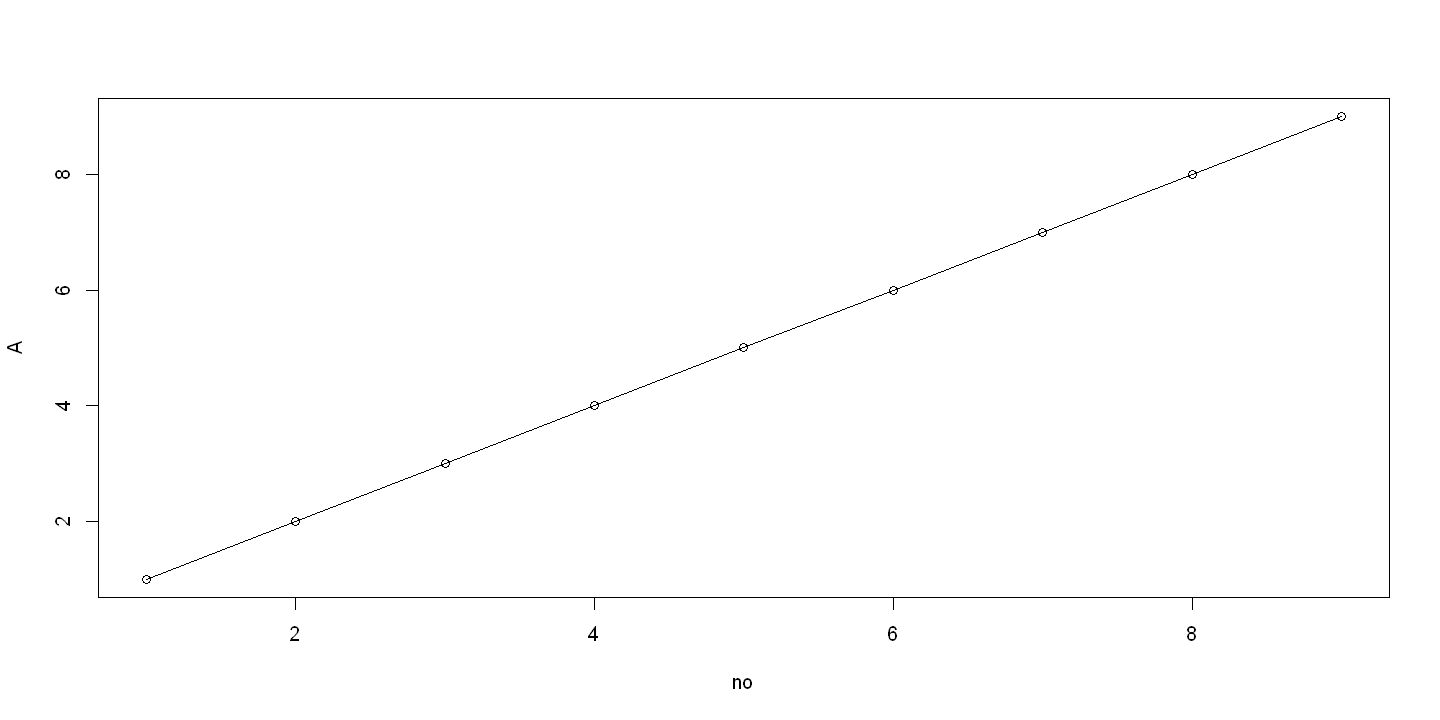

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

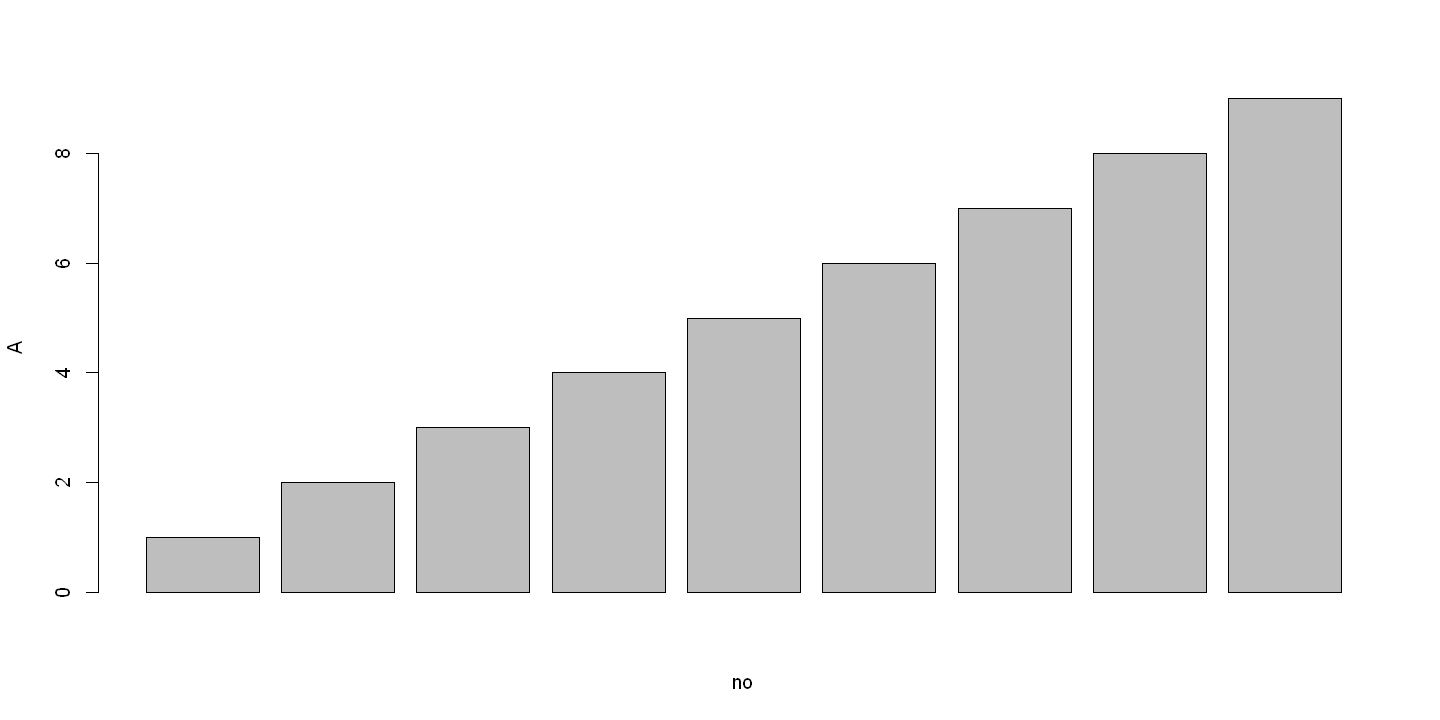

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')

---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**ಅಸ್ವೀಕರಣ**:  
ಈ ದಸ್ತಾವೇಜು [Co-op Translator](https://github.com/Azure/co-op-translator) ಎಂಬ AI ಅನುವಾದ ಸೇವೆಯನ್ನು ಬಳಸಿ ಅನುವಾದಿಸಲಾಗಿದೆ. ನಾವು ಶುದ್ಧತೆಯತ್ತ ಪ್ರಯತ್ನಿಸುತ್ತಿದ್ದರೂ, ಸ್ವಯಂಚಾಲಿತ ಅನುವಾದಗಳಲ್ಲಿ ತಪ್ಪುಗಳು ಅಥವಾ ಅಸತ್ಯತೆಗಳು ಇರಬಹುದು ಎಂದು ದಯವಿಟ್ಟು ಗಮನಿಸಿ. ಮೂಲ ಭಾಷೆಯಲ್ಲಿರುವ ಮೂಲ ದಸ್ತಾವೇಜನ್ನು ಅಧಿಕೃತ ಮೂಲವೆಂದು ಪರಿಗಣಿಸಬೇಕು. ಮಹತ್ವದ ಮಾಹಿತಿಗಾಗಿ, ವೃತ್ತಿಪರ ಮಾನವ ಅನುವಾದವನ್ನು ಶಿಫಾರಸು ಮಾಡಲಾಗುತ್ತದೆ. ಈ ಅನುವಾದ ಬಳಕೆಯಿಂದ ಉಂಟಾಗುವ ಯಾವುದೇ ತಪ್ಪು ಅರ್ಥಮಾಡಿಕೊಳ್ಳುವಿಕೆ ಅಥವಾ ತಪ್ಪು ವಿವರಣೆಗಳಿಗೆ ನಾವು ಹೊಣೆಗಾರರಾಗುವುದಿಲ್ಲ.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
